In [1]:
from latools import *
from sympy import *
init_printing(use_latex=True)

In [2]:
def matrix_to_system_latex(A, vnames):
    m, n = A.shape
    vs = symbols(vnames)
    sout = '\\begin{{alignat*}}{{{}}}\n'.format(2*n+1)
    for i in range(m):
        leading = True
        for j in range(n):
            a = A[i,j]
            if j < n - 1:
                v = vs[j]
                if a == 0:
                    sout += '&{}\hphantom{+}{}&'
                    continue
                pm = '-' if a < 0 else '+' if not leading else '\hphantom{+}'
                sout += ' &{}' + pm + '{}& ' + latex(abs(a)*v)
                leading = False
            else:
                if leading:
                    sout += '0'
                sout += ' &{{}}={{}}{}'.format(latex(a))
        sout += '\\\\ \n'
        
    sout += '\end{alignat*}\n'
    return sout

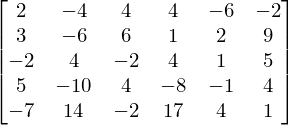

In [3]:
A = matrix_to_rational([[ 2,  -4,  4,  4, -6, -2],
                        [ 3,  -6,  6,  1,  2,  9],
                        [-2,   4, -2,  4,  1,  5],
                        [ 5, -10,  4, -8, -1,  4],
                        [-7,  14, -2, 17,  4,  1]])
A

In [4]:
print(matrix_to_system_latex(A, 'x, y, z, u, v'))

\begin{alignat*}{13}
 &{}\hphantom{+}{}& 2 x &{}-{}& 4 y &{}+{}& 4 z &{}+{}& 4 u &{}-{}& 6 v &{}={}-2\\ 
 &{}\hphantom{+}{}& 3 x &{}-{}& 6 y &{}+{}& 6 z &{}+{}& u &{}+{}& 2 v &{}={}9\\ 
 &{}-{}& 2 x &{}+{}& 4 y &{}-{}& 2 z &{}+{}& 4 u &{}+{}& v &{}={}5\\ 
 &{}\hphantom{+}{}& 5 x &{}-{}& 10 y &{}+{}& 4 z &{}-{}& 8 u &{}-{}& v &{}={}4\\ 
 &{}-{}& 7 x &{}+{}& 14 y &{}-{}& 2 z &{}+{}& 17 u &{}+{}& 4 v &{}={}1\\ 
\end{alignat*}



\begin{alignat*}{13}
 &{}\hphantom{+}{}& 2 x &{}-{}& 4 y &{}+{}& 4 z &{}+{}& 4 u &{}-{}& 6 v &{}={}-2\\ 
 &{}\hphantom{+}{}& 3 x &{}-{}& 6 y &{}+{}& 6 z &{}+{}& u &{}+{}& 2 v &{}={}9\\ 
 &{}-{}& 2 x &{}+{}& 4 y &{}-{}& 2 z &{}+{}& 4 u &{}+{}& v &{}={}5\\ 
 &{}\hphantom{+}{}& 5 x &{}-{}& 10 y &{}+{}& 4 z &{}-{}& 8 u &{}-{}& v &{}={}4\\ 
 &{}-{}& 7 x &{}+{}& 14 y &{}-{}& 2 z &{}+{}& 17 u &{}+{}& 4 v &{}={}1\\ 
\end{alignat*}

In [6]:
print(latex(A))

\left[\begin{matrix}2 & -4 & 4 & 4 & -6 & -2\\3 & -6 & 6 & 1 & 2 & 9\\-2 & 4 & -2 & 4 & 1 & 5\\5 & -10 & 4 & -8 & -1 & 4\\-7 & 14 & -2 & 17 & 4 & 1\end{matrix}\right]


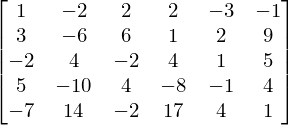

In [7]:
A1 = rop(A, 'R1*(1/2)=>R1')
A1

In [8]:
print(latex(A1))

\left[\begin{matrix}1 & -2 & 2 & 2 & -3 & -1\\3 & -6 & 6 & 1 & 2 & 9\\-2 & 4 & -2 & 4 & 1 & 5\\5 & -10 & 4 & -8 & -1 & 4\\-7 & 14 & -2 & 17 & 4 & 1\end{matrix}\right]


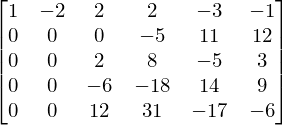

In [9]:
A2 = rop(A1, 'R1*(-3)+R2=>R2', 'R1*(2)+R3=>R3', 'R1*(-5)+R4=>R4', 'R1*(7)+R5=>R5')
A2

In [10]:
print(latex(A2))

\left[\begin{matrix}1 & -2 & 2 & 2 & -3 & -1\\0 & 0 & 0 & -5 & 11 & 12\\0 & 0 & 2 & 8 & -5 & 3\\0 & 0 & -6 & -18 & 14 & 9\\0 & 0 & 12 & 31 & -17 & -6\end{matrix}\right]


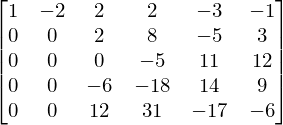

In [11]:
A3 = rop(A2,'R2<=>R3')
A3

In [12]:
print(latex(A3))

\left[\begin{matrix}1 & -2 & 2 & 2 & -3 & -1\\0 & 0 & 2 & 8 & -5 & 3\\0 & 0 & 0 & -5 & 11 & 12\\0 & 0 & -6 & -18 & 14 & 9\\0 & 0 & 12 & 31 & -17 & -6\end{matrix}\right]


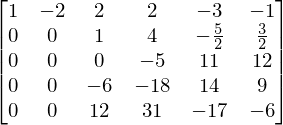

In [13]:
A4 = rop(A3, 'R2*(1/2)=>R2')
A4

In [14]:
print(latex(A4))

\left[\begin{matrix}1 & -2 & 2 & 2 & -3 & -1\\0 & 0 & 1 & 4 & - \frac{5}{2} & \frac{3}{2}\\0 & 0 & 0 & -5 & 11 & 12\\0 & 0 & -6 & -18 & 14 & 9\\0 & 0 & 12 & 31 & -17 & -6\end{matrix}\right]


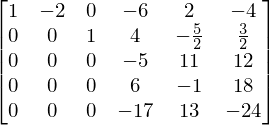

In [15]:
A5 = rop(A4, 'R2*(-2)+R1=>R1', 'R2*(6)+R4=>R4', 'R2*(-12)+R5=>R5')
A5

In [16]:
print(latex(A5))

\left[\begin{matrix}1 & -2 & 0 & -6 & 2 & -4\\0 & 0 & 1 & 4 & - \frac{5}{2} & \frac{3}{2}\\0 & 0 & 0 & -5 & 11 & 12\\0 & 0 & 0 & 6 & -1 & 18\\0 & 0 & 0 & -17 & 13 & -24\end{matrix}\right]


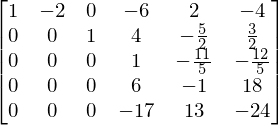

In [17]:
A6 = rop(A5, 'R3*(-1/5)=>R3')
A6

In [18]:
print(latex(A6))

\left[\begin{matrix}1 & -2 & 0 & -6 & 2 & -4\\0 & 0 & 1 & 4 & - \frac{5}{2} & \frac{3}{2}\\0 & 0 & 0 & 1 & - \frac{11}{5} & - \frac{12}{5}\\0 & 0 & 0 & 6 & -1 & 18\\0 & 0 & 0 & -17 & 13 & -24\end{matrix}\right]


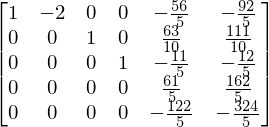

In [19]:
A7 = rop(A6, 'R3*(6)+R1=>R1', 'R3*(-4)+R2=>R2', 'R3*(-6)+R4=>R4', 'R3*(17)+R5=>R5')
A7

In [20]:
print(latex(A7))

\left[\begin{matrix}1 & -2 & 0 & 0 & - \frac{56}{5} & - \frac{92}{5}\\0 & 0 & 1 & 0 & \frac{63}{10} & \frac{111}{10}\\0 & 0 & 0 & 1 & - \frac{11}{5} & - \frac{12}{5}\\0 & 0 & 0 & 0 & \frac{61}{5} & \frac{162}{5}\\0 & 0 & 0 & 0 & - \frac{122}{5} & - \frac{324}{5}\end{matrix}\right]


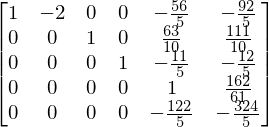

In [21]:
A8 = rop(A7, 'R4*(5/61)=>R4')
A8

In [22]:
print(latex(A))

\left[\begin{matrix}2 & -4 & 4 & 4 & -6 & -2\\3 & -6 & 6 & 1 & 2 & 9\\-2 & 4 & -2 & 4 & 1 & 5\\5 & -10 & 4 & -8 & -1 & 4\\-7 & 14 & -2 & 17 & 4 & 1\end{matrix}\right]


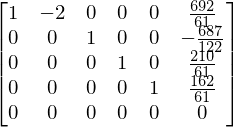

In [23]:
A9 = rop(A8, 'R4*(56/5)+R1=>R1', 'R4*(-63/10)+R2=>R2', 'R4*(11/5)+R3=>R3', 'R4*(122/5)+R5=>R5')
A9

In [24]:
print(latex(A9))

\left[\begin{matrix}1 & -2 & 0 & 0 & 0 & \frac{692}{61}\\0 & 0 & 1 & 0 & 0 & - \frac{687}{122}\\0 & 0 & 0 & 1 & 0 & \frac{210}{61}\\0 & 0 & 0 & 0 & 1 & \frac{162}{61}\\0 & 0 & 0 & 0 & 0 & 0\end{matrix}\right]


In [25]:
print(matrix_to_system_latex(A9, 'x, y, z, u, v'))

\begin{alignat*}{13}
 &{}\hphantom{+}{}& x &{}-{}& 2 y&{}\hphantom{+}{}&&{}\hphantom{+}{}&&{}\hphantom{+}{}& &{}={}\frac{692}{61}\\ 
&{}\hphantom{+}{}&&{}\hphantom{+}{}& &{}\hphantom{+}{}& z&{}\hphantom{+}{}&&{}\hphantom{+}{}& &{}={}- \frac{687}{122}\\ 
&{}\hphantom{+}{}&&{}\hphantom{+}{}&&{}\hphantom{+}{}& &{}\hphantom{+}{}& u&{}\hphantom{+}{}& &{}={}\frac{210}{61}\\ 
&{}\hphantom{+}{}&&{}\hphantom{+}{}&&{}\hphantom{+}{}&&{}\hphantom{+}{}& &{}\hphantom{+}{}& v &{}={}\frac{162}{61}\\ 
&{}\hphantom{+}{}&&{}\hphantom{+}{}&&{}\hphantom{+}{}&&{}\hphantom{+}{}&&{}\hphantom{+}{}&0 &{}={}0\\ 
\end{alignat*}



\begin{alignat*}{13}
 &{}\hphantom{+}{}& x &{}-{}& 2 y&{}\hphantom{+}{}&&{}\hphantom{+}{}&&{}\hphantom{+}{}& &{}={}\frac{692}{61}\\ 
&{}\hphantom{+}{}&&{}\hphantom{+}{}& &{}\hphantom{+}{}& z&{}\hphantom{+}{}&&{}\hphantom{+}{}& &{}={}- \frac{687}&&{122}\\ 
{}\hphantom{+}{}&&{}\hphantom{+}{}&&{}\hphantom{+}{}& &{}\hphantom{+}{}& u&{}\hphantom{+}{}& &{}={}\frac{210}{61}\\ 
{}\hphantom{+}{}&&{}\hphantom{+}{}&&{}\hphantom{+}{}&&{}\hphantom{+}{}& &{}\hphantom{+}{}& v &{}={}\frac{162}{61}\\ 
{}\hphantom{+}{}&&{}\hphantom{+}{}&&{}\hphantom{+}{}&&{}\hphantom{+}{}&&{}\hphantom{+}{}&0 &{}={}0\\ 
\end{alignat*}